# Arctic sea ice basemap with contour lines


## References

http://onlinelibrary.wiley.com/doi/10.1111/j.1931-0846.2016.12195.x/abstract

https://www.carbonbrief.org/guest-post-piecing-together-arctic-sea-ice-history-1850


ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G10010/G10010_SIBT1850_v1.1.zip

In [2]:
!wget ftp://sidads.colorado.edu/pub/DATASETS/NOAA/G10010/G10010_SIBT1850_v1.1.zip
!unzip G10010_SIBT1850_v1.1.zip

<IPython.core.display.Javascript object>


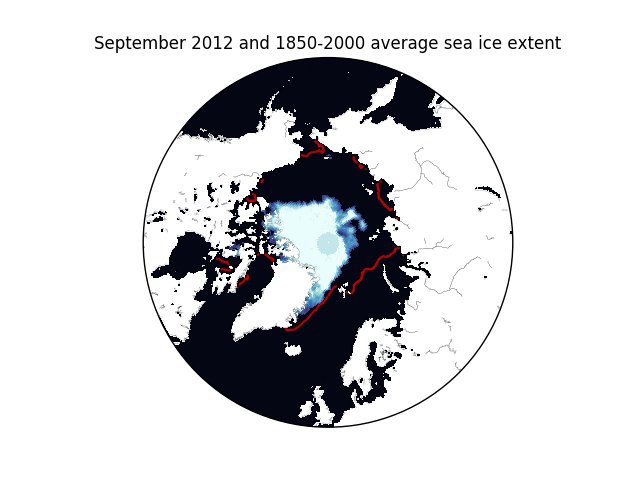

/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)
/usr/lib/python3/dist-packages/mpl_toolkits/basemap/__in

Text(0.5,1,'September 2012 and 1850-2000 average sea ice extent')

In [43]:
%matplotlib notebook

from pylab import *
import netCDF4
from mpl_toolkits.basemap import Basemap, addcyclic
import numpy.ma as ma
#import pyproj
import cmocean

# Download sea ice concentration 1850-2013 from NSIDC website
# Walsh et al. (2016)
f='G10010_SIBT1850_v1.1.nc'
fid=netCDF4.Dataset(f)
lat2=fid.variables['latitude'][:]
lon2=fid.variables['longitude'][:]
Sic=array(fid.variables['seaice_conc']) # Second Sic capitalized
Sic[Sic<0]=nan # mark missing values with nan
Sic=ma.masked_invalid(Sic)
Lon,Lat=meshgrid(lon2,lat2)

Sicm=mean(Sic[8::12,:,:][0:150,:,:],axis=0)# Calculate mean over first 150 years September
i=2012-1850
Sic2012=Sic[i*12+8,:,:]# Sept 2012


m = Basemap(projection='npstere',boundinglat=50,lon_0=0,resolution='l',round=True)
m.drawcoastlines(linewidth=0.1,color='k')
Xg,Yg=m(Lon,Lat)# Calculate nsper coordinates for 1850-2013 and 
m.pcolormesh(Xg,Yg,Sic2012,cmap=cmocean.cm.ice)
m.contour(Xg,Yg,Sicm,array([15]),colors="r",linewidth=2,alpha=0.7)
title('September 2012 and 1850-2000 average sea ice extent')
